In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, GridSearchCV
import matplotlib.pyplot as plt
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import copy
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import r2_score, roc_auc_score

In [3]:
train = pd.read_csv("SpotifyFeatures.csv")

In [4]:
drop_list = ['time_signature', 'mode', 'key', 'genre', 'artist_name', 'track_name', 'track_name', 'track_id']
train = train.drop(drop_list, axis=1)

In [5]:
train.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,21,0.986,0.313,490867,0.23100,0.000431,0.0964,-14.287,0.0547,86.001,0.0886
1,18,0.972,0.360,176797,0.20100,0.028000,0.1330,-19.794,0.0581,131.798,0.3690
2,10,0.935,0.168,266184,0.47000,0.020400,0.3630,-8.415,0.0383,75.126,0.0696
3,17,0.961,0.250,288573,0.00605,0.000000,0.1200,-33.440,0.0480,76.493,0.0380
4,19,0.985,0.142,629760,0.05800,0.146000,0.0969,-23.625,0.0493,172.935,0.0382


In [6]:
train = train.dropna(axis=0, how='any')

In [7]:
Y = copy.deepcopy(train.popularity)
Y.shape

(228159,)

In [8]:
train = train.drop("popularity", axis=1)

In [9]:
print(train.shape, Y.shape)

(228159, 10) (228159,)


In [10]:
X_train, X_test, y_train, y_test = train_test_split(train, Y, test_size=0.33, random_state=7)
model = XGBRegressor()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
accuracy = model.score(X_test, y_test)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 36.86%


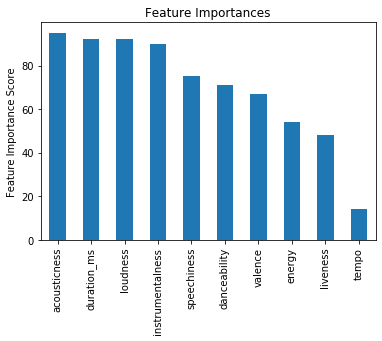

In [11]:
feat_imp = pd.Series(model.get_booster().get_fscore()).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')
plt.show()

In [14]:
def scatter(x, y, xlabel, ylabel):
    plt.scatter(x, y, s=1)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.savefig("corr_"+str(xlabel)+".png")
    plt.clf()

for f in train.columns:
    scatter(train[f], Y, f, 'Y')

<Figure size 432x288 with 0 Axes>